In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
train_data = pd.read_csv('C:/Users/Pranav/OneDrive/Desktop/Final_Practical/LP-IV-datasets/LP-IV-datasets/LP-IV-datasets/CIFR(Ass2&3)/train_data.csv',header=None)
test_data = pd.read_csv('C:/Users/Pranav/OneDrive/Desktop/Final_Practical/LP-IV-datasets/LP-IV-datasets/LP-IV-datasets/CIFR(Ass2&3)/test_data.csv',header=None)

C:\Users\Pranav\AppData\Local\Temp\ipykernel_48852\2007956139.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
1,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
2,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
3,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
4,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4


In [4]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
1,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
2,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
3,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
4,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0


In [5]:
test_data.drop(0, inplace=True)

In [6]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
1,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
2,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
3,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
4,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
5,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,76,78,133,76,78,134,77,80,132,76,...,204,219,236,200,215,234,199,216,236,8
9997,81,57,43,91,69,53,98,75,63,106,...,155,139,129,171,167,147,167,164,160,3
9998,20,15,12,19,14,11,15,14,11,15,...,24,23,50,26,23,53,25,20,47,5
9999,25,40,12,15,36,3,23,41,18,17,...,93,124,80,95,123,81,92,120,80,1


In [7]:
x_test = test_data.drop([3072],axis=1)
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
1,158,112,49,159,111,47,165,116,51,166,...,145,24,77,124,34,84,129,21,67,110
2,235,235,235,231,231,231,232,232,232,232,...,163,168,183,178,180,195,191,186,200,199
3,158,190,222,158,187,218,139,166,194,132,...,37,5,6,8,4,5,3,7,8,7
4,155,156,149,167,176,187,176,179,193,190,...,53,60,63,50,64,65,52,73,68,50
5,65,68,50,70,81,64,48,64,46,30,...,147,143,179,136,154,185,146,128,156,117


In [8]:
x_trainn = train_data
x_trainn.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
1,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
2,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
3,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
4,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4


In [9]:
x_trainn.drop(0,inplace=True)
x_trainn.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
1,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
2,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
3,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
4,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
5,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1


In [10]:
x_train = x_trainn.drop([3072],axis=1)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
1,59,62,63,43,46,45,50,48,43,68,...,104,216,184,140,151,118,84,123,92,72
2,154,177,187,126,137,136,105,104,95,102,...,136,143,133,139,143,134,142,143,133,144
3,255,255,255,253,253,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
4,28,25,10,37,34,19,38,35,20,42,...,38,54,47,28,63,56,37,72,65,46
5,170,180,198,168,178,196,177,185,203,183,...,78,75,79,82,71,75,78,73,77,80


In [11]:
y_train = train_data[3072]
y_train.head()

1    6
2    9
3    9
4    4
5    1
Name: 3072, dtype: object

In [12]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
1,158,112,49,159,111,47,165,116,51,166,...,145,24,77,124,34,84,129,21,67,110
2,235,235,235,231,231,231,232,232,232,232,...,163,168,183,178,180,195,191,186,200,199
3,158,190,222,158,187,218,139,166,194,132,...,37,5,6,8,4,5,3,7,8,7
4,155,156,149,167,176,187,176,179,193,190,...,53,60,63,50,64,65,52,73,68,50
5,65,68,50,70,81,64,48,64,46,30,...,147,143,179,136,154,185,146,128,156,117


In [13]:
y_test = test_data[3072]
y_test.head()

1    3
2    8
3    8
4    0
5    6
Name: 3072, dtype: object

In [14]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
x_train = x_train.reshape(50000,32,32,3).astype('float32')/255.0
x_test = x_test.reshape(10000,32,32,3).astype('float32')/255.0
# x_train = x_train.astype('float32')/255.0
# x_test = x_test.astype('float32')/255.0

In [16]:
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [17]:
model = Sequential()

In [18]:
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

C:\Users\Pranav\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import SGD, Adam

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
h = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=2)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6802 - loss: 0.9151 - val_accuracy: 0.6683 - val_loss: 0.9405
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7053 - loss: 0.8381 - val_accuracy: 0.6869 - val_loss: 0.9141


In [30]:
test_loss,test_acc = model.evaluate(x_test, y_test)
print('Test loss: ',test_loss,'Test accuracy: ',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6865 - loss: 0.9008
Test loss:  0.9140834212303162 Test accuracy:  0.6869000196456909


In [38]:
h.history

{'accuracy': [0.6798200011253357, 0.7027199864387512],
 'loss': [0.9161502122879028, 0.8475393652915955],
 'val_accuracy': [0.6682999730110168, 0.6869000196456909],
 'val_loss': [0.9405218958854675, 0.9140834212303162]}

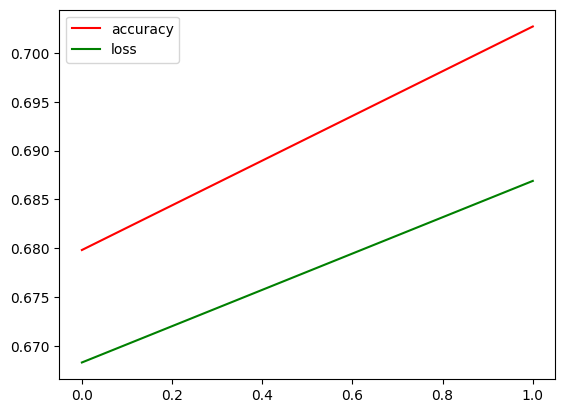

In [37]:
plt.plot(h.history['accuracy'],label='accuracy', color="red")
plt.plot(h.history['val_accuracy'],label='loss', color = "green")
plt.legend()